# Data analysis for restraunts in bangalore

In [1]:
import requests # to handle requests
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
    
#tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
%matplotlib inline
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_09cb70679c41485288b115d38d5b5317 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DH-qcko2Yd6PiOaVB7tPEx7NHudeeBTKMTNO1t4hYxTh',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_09cb70679c41485288b115d38d5b5317.get_object(Bucket='appliedcapstone-donotdelete-pr-gezitevuljy031',Key='zomato.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.drop(['url','phone','reviews_list','menu_item'],axis = 1,inplace = True)

In [4]:
df = df[['name','address','online_order','book_table','rate','votes','location','dish_liked','cuisines','approx_cost(for two people)','listed_in(type)','rest_type',]]
cols = df.columns.tolist()
cols

['name',
 'address',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'listed_in(type)',
 'rest_type']

# Exploratory Data analysis

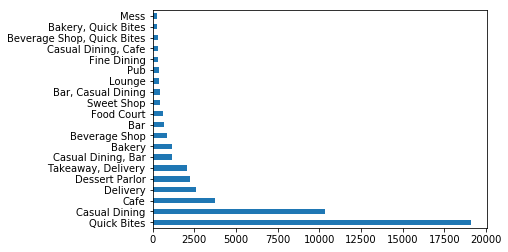

In [5]:
pd.value_counts(df['rest_type'])[:20].plot(kind = 'barh')

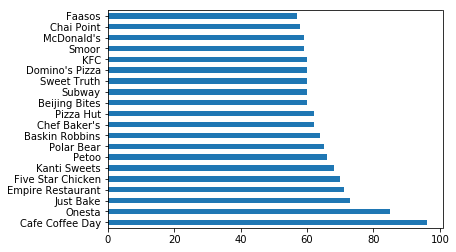

In [6]:
pd.value_counts(df['name'])[:20].plot(kind = 'barh')

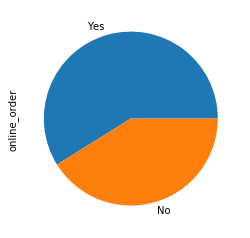

In [7]:
# checking the number of online orders made
df['online_order'].value_counts().plot(kind ='pie')

In [8]:
df.groupby(['location']).sum()[:10].sort_values(by = 'votes', ascending=False)

,votes
location,
BTM,619376
Brigade Road,429620
Bannerghatta Road,219077
Bellandur,206027
Banashankari,162374
Brookefield,118991
Basavanagudi,94919
Banaswadi,35657
Basaveshwara Nagar,18133


In [9]:
df[['rating','out_of']] = df.rate.str.split("/",expand=True)

In [10]:
df.drop(['out_of'], inplace = True, axis=1)

In [11]:
df['rating'] = pd.to_numeric(df['rating'].astype(str).str[:-1], errors='coerce')
df.dropna(subset=['rating'], inplace = True)

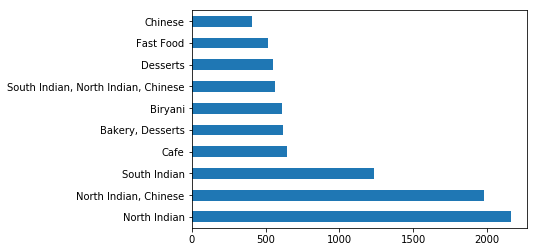

In [12]:
df['cuisines'].value_counts()[:10].plot(kind = 'barh')

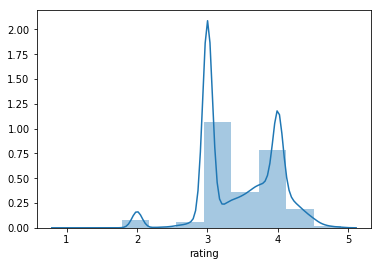

In [13]:
sns.distplot(df['rating'],bins=10)

In [14]:
df.dropna(subset = ['cuisines'])

,name,address,online_order,book_table,rate,votes,location,dish_liked,cuisines,approx_cost(for two people),listed_in(type),rest_type,rating
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Casual Dining,4.0
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Casual Dining,4.0
2,San Churro Cafe,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,"Cafe, Casual Dining",3.0
3,Addhuri Udupi Bhojana,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,Banashankari,Masala Dosa,"South Indian, North Indian",300,Buffet,Quick Bites,3.0
4,Grand Village,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Casual Dining,3.0
5,Timepass Dinner,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Yes,No,3.8/5,286,Basavanagudi,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet,Casual Dining,3.0
6,Rosewood International Hotel - Bar & Restaurant,"19/1, New Timberyard Layout, Beside Satellite ...",No,No,3.6/5,8,Mysore Road,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Casual Dining,3.0
7,Onesta,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Yes,Yes,4.6/5,2556,Banashankari,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes,"Casual Dining, Cafe",4.0
8,Penthouse Cafe,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Yes,No,4.0/5,324,Banashankari,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,Cafes,Cafe,4.0
9,Smacznego,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Yes,No,4.2/5,504,Banashankari,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Cafe,4.0


In [15]:
df_NI = df[df['cuisines'].str.contains('North Indian', na=False)]

In [16]:
df_NI.drop(['rate'], inplace = True, axis = 1)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
# Now we have a dataframe of north indian restaurants
# looking at the top 20 type of restaurants that serve north indian food
df_NI['rest_type'].value_counts()[:20]

Casual Dining                  6318
Quick Bites                    6243
Delivery                        907
Casual Dining, Bar              658
Takeaway, Delivery              598
Bar                             414
Pub                             215
Cafe                            213
Bar, Casual Dining              202
Fine Dining                     184
Lounge                          178
Pub, Casual Dining              151
Food Court                      138
Casual Dining, Cafe              92
Mess                             58
Casual Dining, Pub               56
Casual Dining, Microbrewery      50
Microbrewery, Casual Dining      49
Sweet Shop, Quick Bites          47
Pub, Cafe                        40
Name: rest_type, dtype: int64

In [18]:
CLIENT_ID = 'EZQZHJGPSF3L0IBCPD4REO5HPO4ZHVQSDRVXME1BE5C05DQD' #Foursquare ID
CLIENT_SECRET = 'TZXID01R4CRDVLSCQ0EADM2AQ3X1RX2DDJI42SYKHEBJSM1Q'
 #Foursquare Secret
VERSION = '20181201'
LIMIT = 100

Now In order to maximise the potential of our restaurant, the cuisine should include North Indian and the location should preferably be BTM

In [19]:
# BTMs lat long was taken from google
lat_BTM = 12.9166
long_BTM = 77.6101

In [20]:
search_query = 'Restaurant'
radius = 5000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_BTM, long_BTM, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=EZQZHJGPSF3L0IBCPD4REO5HPO4ZHVQSDRVXME1BE5C05DQD&client_secret=TZXID01R4CRDVLSCQ0EADM2AQ3X1RX2DDJI42SYKHEBJSM1Q&ll=12.9166,77.6101&v=20181201&query=Restaurant&radius=5000&limit=100'

In [21]:
rest_locs = requests.get(url).json()
rest_locs

{'meta': {'code': 200, 'requestId': '5e2679bd98205d001b62f8fe'},
 'response': {'venues': [{'id': '4f8da203e4b01d92a6e3d3f5',
    'name': "Sandy's Korner Restaurant",
    'location': {'address': '13th Main, 7th Cross',
     'crossStreet': 'BTM 2nd Stage',
     'lat': 12.91398475233245,
     'lng': 77.60912093170366,
     'labeledLatLngs': [{'label': 'display',
       'lat': 12.91398475233245,
       'lng': 77.60912093170366}],
     'distance': 309,
     'cc': 'IN',
     'city': 'Bangalore',
     'state': 'Karnātaka',
     'country': 'India',
     'formattedAddress': ['13th Main, 7th Cross (BTM 2nd Stage)',
      'Bangalore',
      'Karnātaka',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1579579898',
    'ha

In [22]:
restaurants = rest_locs['response']['venues']

In [23]:
rdf = json_normalize(restaurants)
rdf.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4f8da203e4b01d92a6e3d3f5,"13th Main, 7th Cross",IN,Bangalore,India,BTM 2nd Stage,309,"[13th Main, 7th Cross (BTM 2nd Stage), Bangalo...","[{'label': 'display', 'lat': 12.91398475233245...",12.913985,77.609121,NaN,Karnātaka,Sandy's Korner Restaurant,v-1579579898
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4d4ede984a38b60c014eee66,BTM Layout,IN,Bangalore,India,NaN,1136,"[BTM Layout, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.925498, 'lng':...",12.925498,77.615231,NaN,Karnātaka,Raja Rajeshwari Restaurant,v-1579579898
2,"[{'id': '54135bf5e4b08f3d2429dfdd', 'name': 'N...",False,5794ded6498e1e1d10377be9,"2nd floor, Forum mall",IN,NaN,India,Koramangala 7th block,2097,"[2nd floor, Forum mall (Koramangala 7th block)...","[{'label': 'display', 'lat': 12.935298, 'lng':...",12.935298,77.612512,NaN,NaN,Salt - Indian Restaurant Bar & Grill,v-1579579898
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4cdf586d825e721e5d827045,"No.82 and 83,2nd Floor,Ktr Complex",IN,Bangalore,India,"Hosur Road,Madiwala",1296,"[No.82 and 83,2nd Floor,Ktr Complex (Hosur Roa...","[{'label': 'display', 'lat': 12.92596537254023...",12.925965,77.617203,560068,Karnātaka,MAS Family Restaurant,v-1579579898
4,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4f805509e4b0c2f7654da749,NaN,IN,Bangalore,India,NaN,2316,"[Bangalore 560034, Karnātaka, India]","[{'label': 'display', 'lat': 12.92891656764973...",12.928917,77.627307,560034,Karnātaka,12th Main Restaurant,v-1579579898


In [24]:
# creating a function to get categorical information for restaurants in BTM
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
rdf['categories'] = rdf.apply(get_category_type, axis=1)

In [26]:
#Plotting the restaurants in BTM obtained through folium
lat_BTM = 12.9166
long_BTM = 77.6101
map_BTM = folium.Map(location=[lat_BTM, long_BTM], zoom_start=14)

for lat, lng, label in zip(rdf['location.lat'], rdf['location.lng'], rdf['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color= '#DF939F',
        fill_opacity=0.6,
    ).add_to(map_BTM)
    
folium.CircleMarker(location=[12.9166, 77.6101], radius=100,
                    popup='BTM Restaurant Zone', line_color='#DF939F',
                    fill_color='#DF939F').add_to(map_BTM)
    
map_BTM
